# Module Title:	 Strategic Thinking - Semester II
### Assessment Title: Capstone Project Semester II
### Lecturer Name:	 James Garza
### Student Full Name & Number:	Natalia de Oliveira Rodrigues 2023112

This academic project aims to delivery a critical analysis of the knowledge produced, in the course: Higher Diploma in Science in Data Analytics for Business at CCT College.

In [8]:
# pip install dtreeviz

In [9]:
# pip install yellowbrick

In [10]:
# conda install -c conda-forge imbalanced-learn

In [11]:
# Importing required libraries.
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import asarray
import statistics as stats
import scipy.stats
from scipy.stats import skew
from scipy.stats import f_oneway
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set(color_codes=True)

from imblearn.over_sampling import SMOTE  
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

from collections import Counter
import dtreeviz
from yellowbrick.model_selection import FeatureImportances

import warnings
warnings.filterwarnings('ignore')

# Data Dictionary:

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase

# 3. Data Understanding

## 3.1 Exploratory Data Analysis (EDA)

In [12]:
# loading the data into dataframe.
df = pd.read_csv('../data/online_shoppers_intention.csv')

In [13]:
df.shape
print('The dataset original shape: ', df.shape)

The dataset original shape:  (12330, 18)


In [14]:
df.isnull().values.any()

False

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [16]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [17]:
df.describe(include=object)

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [18]:
stat=df.describe()
stat.T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [19]:
# Target variable Imbalancing
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

Taking a look to the distribution of our target variable

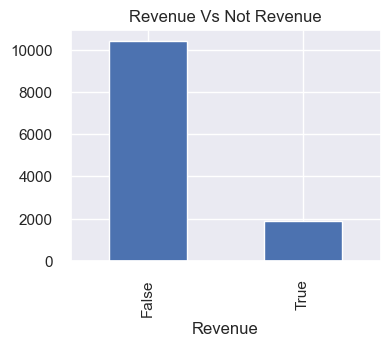

In [20]:
#Bar Plot target variable
target = df.groupby('Revenue').size()
target.plot(kind='bar',figsize=(4,3),
                 title= 'Revenue Vs Not Revenue');

In [21]:
first_df = df.rename(columns={"Administrative": "adm", "Administrative_Duration": "adm_dur",
                        "Informational":"inf","Informational_Duration":"inf_dur","ProductRelated":"prod_rel",
                        "ProductRelated_Duration":"prod_rel_dur","BounceRates":"bounces","ExitRates":"exit",
                        "PageValues":"pg_val","SpecialDay":"s_day","Month":"month","OperatingSystems":"os",
                        "Browser":"browser","Region":"reg","TrafficType":"traffic","VisitorType":"visitor",
                        "Weekend":"kend","Revenue":"rev"})

In [22]:
first_df.head()

,adm,adm_dur,inf,inf_dur,prod_rel,prod_rel_dur,bounces,exit,pg_val,s_day,month,os,browser,reg,traffic,visitor,kend,rev
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [23]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adm           12330 non-null  int64  
 1   adm_dur       12330 non-null  float64
 2   inf           12330 non-null  int64  
 3   inf_dur       12330 non-null  float64
 4   prod_rel      12330 non-null  int64  
 5   prod_rel_dur  12330 non-null  float64
 6   bounces       12330 non-null  float64
 7   exit          12330 non-null  float64
 8   pg_val        12330 non-null  float64
 9   s_day         12330 non-null  float64
 10  month         12330 non-null  object 
 11  os            12330 non-null  int64  
 12  browser       12330 non-null  int64  
 13  reg           12330 non-null  int64  
 14  traffic       12330 non-null  int64  
 15  visitor       12330 non-null  object 
 16  kend          12330 non-null  bool   
 17  rev           12330 non-null  bool   
dtypes: bool(2), float64(7), in

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

## 3.2 Data Visualization

We are going to make Barplots in the categorical and to analize the barplots let's import the next function

In [24]:
def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

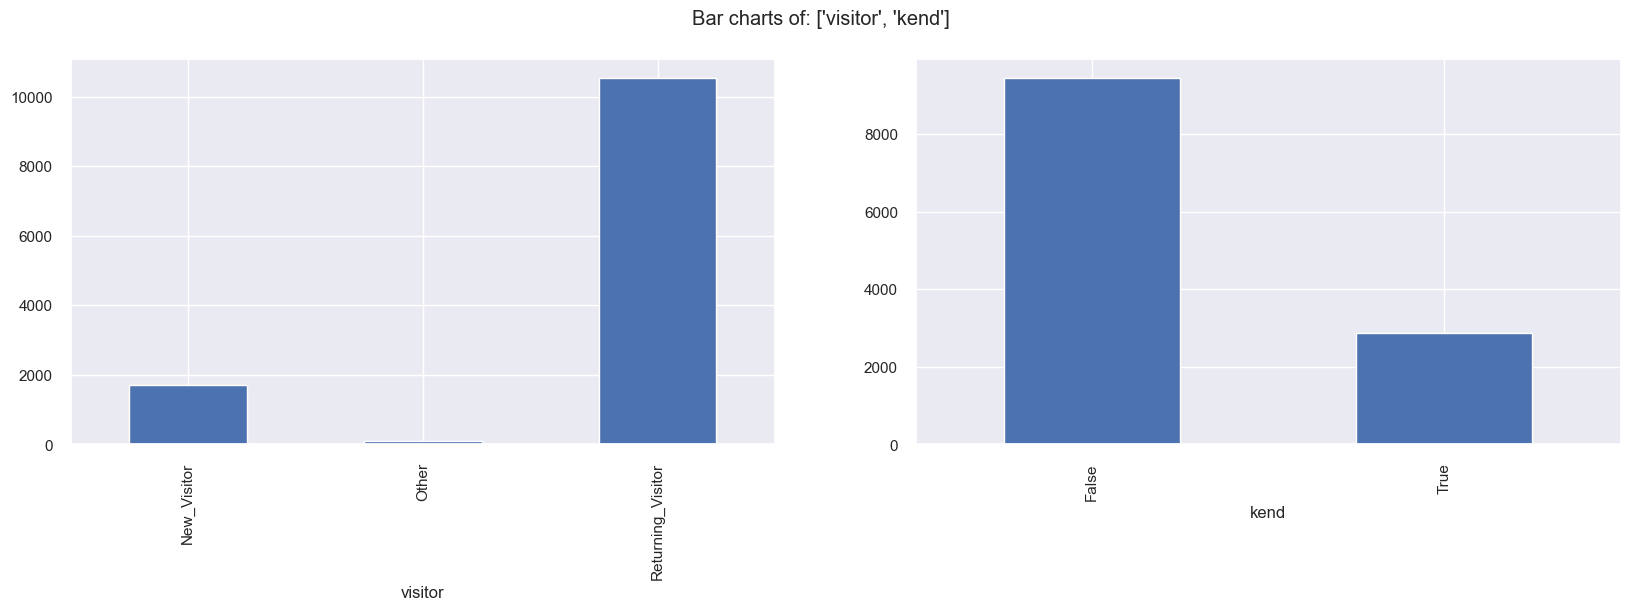

In [25]:
PlotBarCharts(first_df, colsToPlot=['visitor', 'kend'])

Here we can see that the majority the people in our dataset are returning visitors that are around 10000 people and in the barplot of "kend" we can see that few people visit the webside on weekends (represented by True) than the ones that visit between Monday and Friday (represented by False). We can see that they have an acceptable distibution to apply to our model

In [26]:
first_df.month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

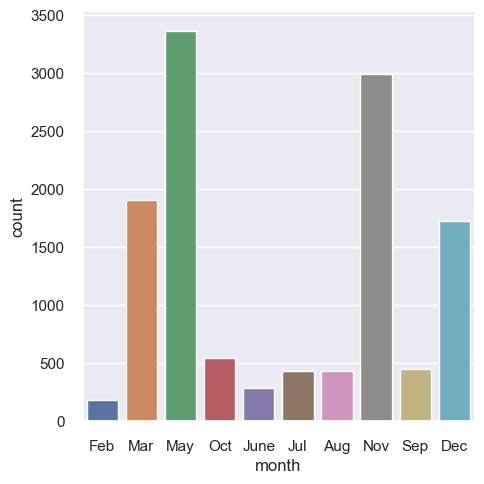

In [27]:
month_order = ['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec']
sns.catplot(x='month', kind='count', data=first_df, order=month_order)

Now let's analyze the categorical discrete variables

In [28]:
int_columns = first_df.select_dtypes(include=['int64']).columns
int_columns

Index(['adm', 'inf', 'prod_rel', 'os', 'browser', 'reg', 'traffic'], dtype='object')

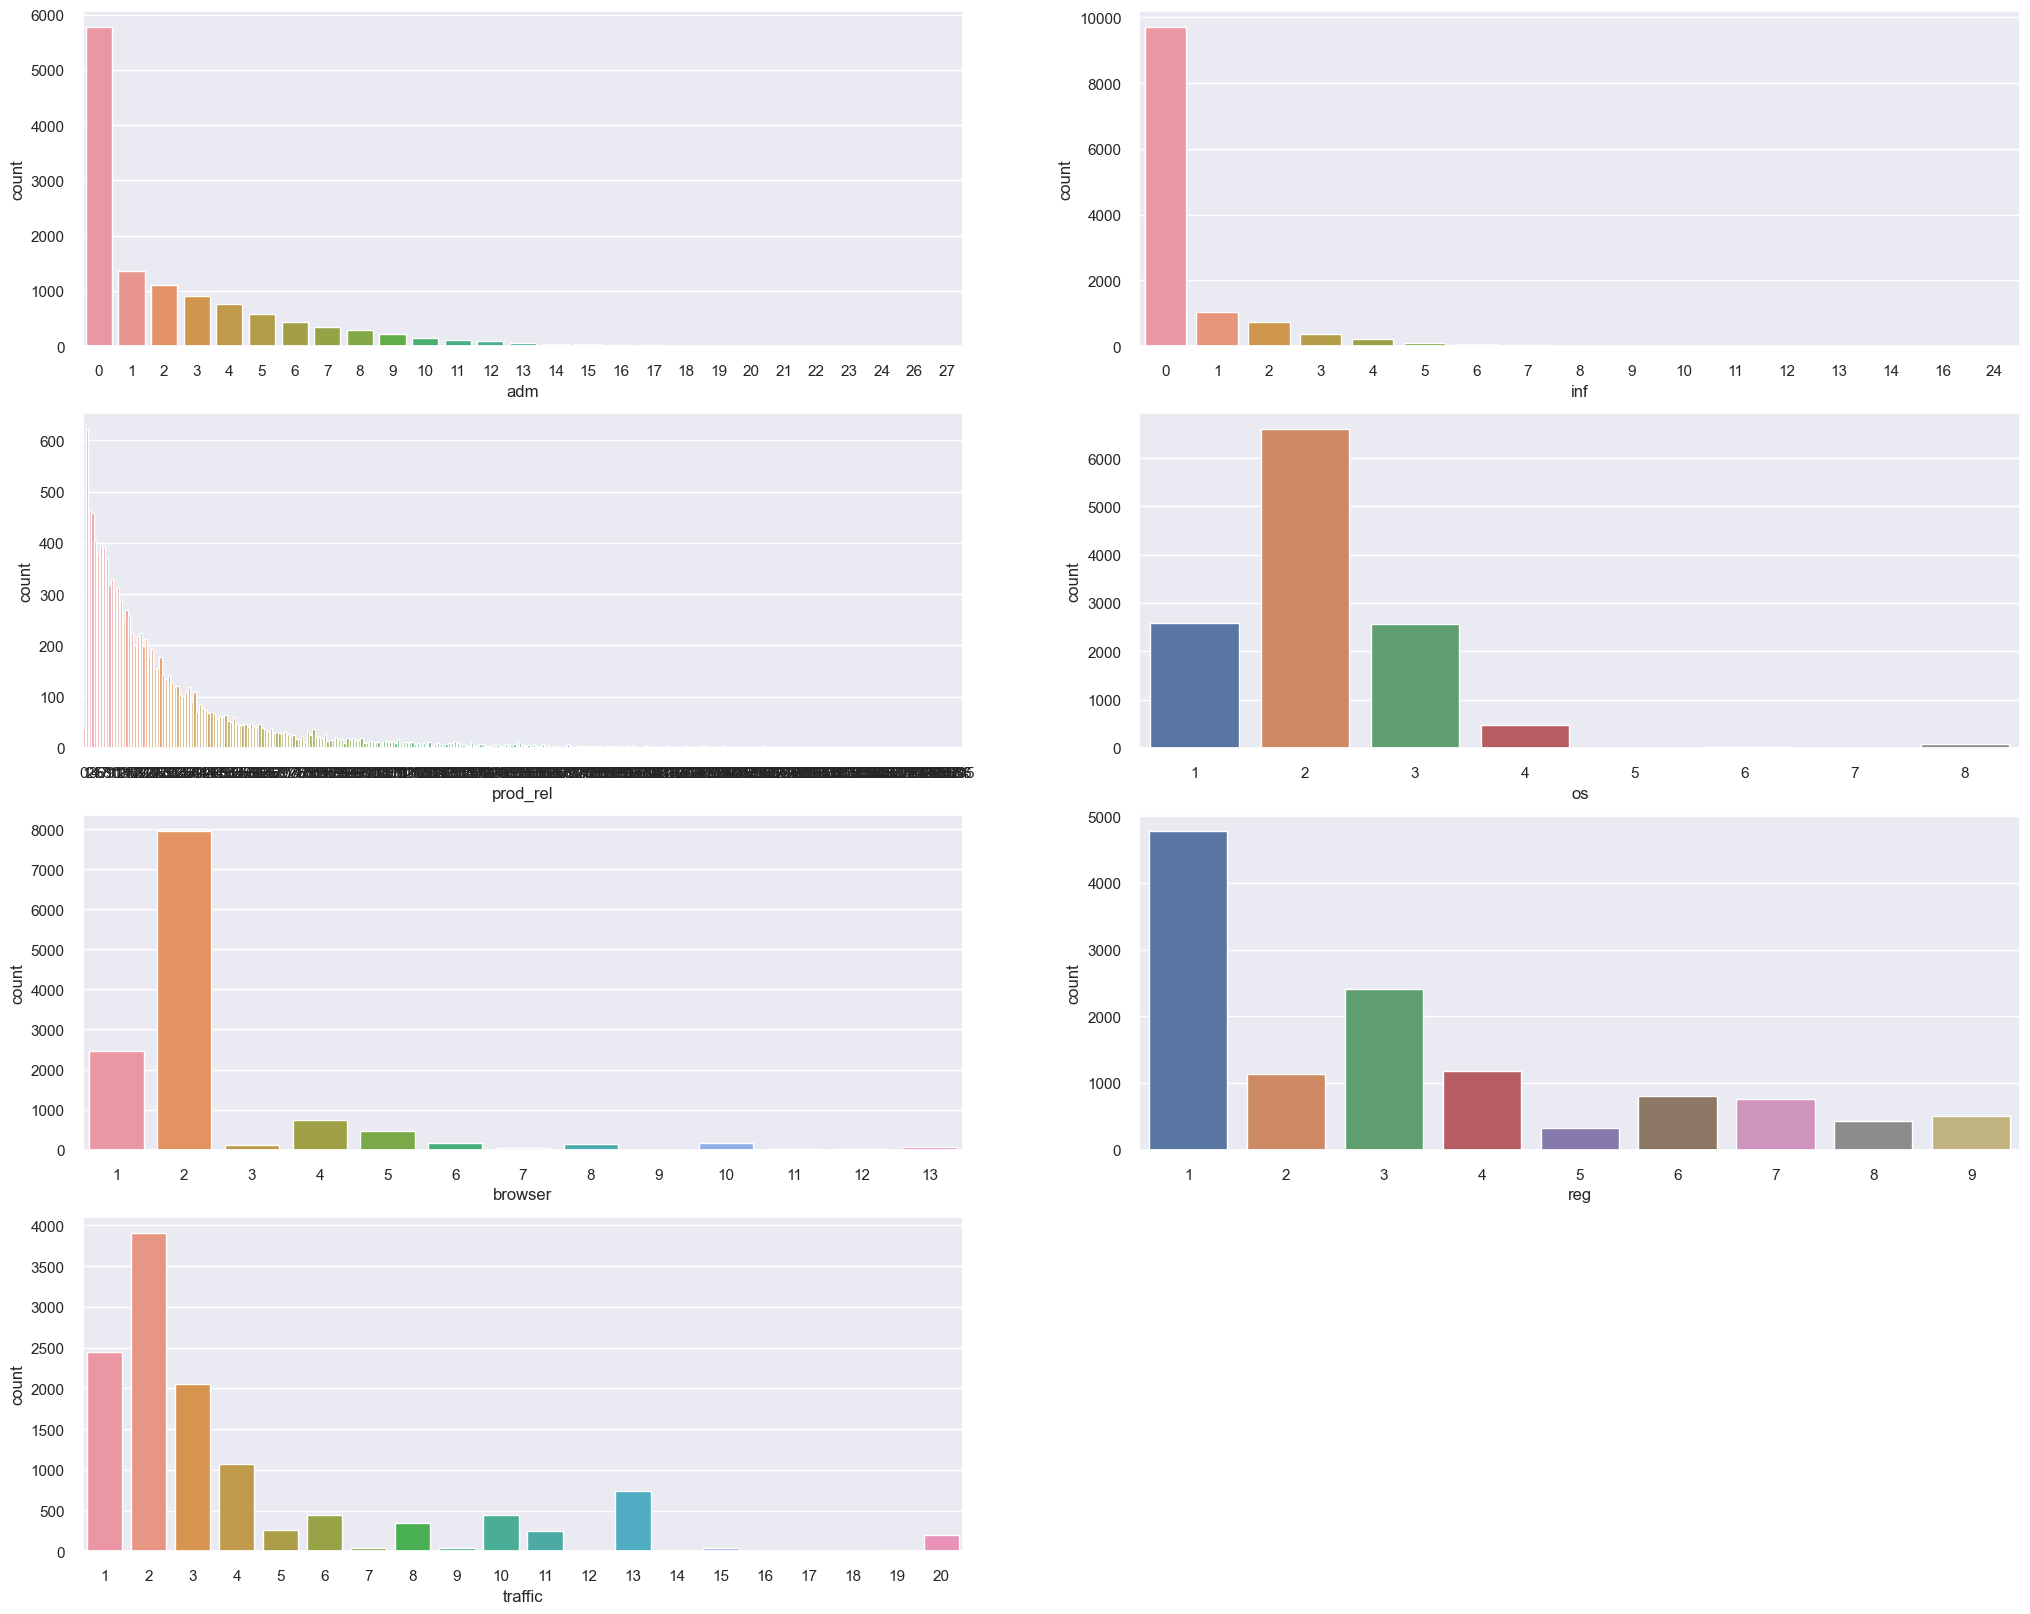

In [29]:
data=first_df
plt.figure(figsize = (25,20))
plt.subplot(4,2,1)
sns.countplot(x = 'adm', palette = None, data = data)
plt.xlabel("adm")
plt.subplot(4,2,2)
sns.countplot(x = 'inf', palette = None, data = data)
plt.xlabel("inf")
plt.subplot(4,2,3)
sns.countplot(x = 'prod_rel', palette = None, data = data)
plt.xlabel("prod_rel")
plt.subplot(4,2,4)
sns.countplot(x = 'os',palette = None, data = data)
plt.xlabel("os")
plt.subplot(4,2,5)
sns.countplot(x = 'browser', palette = None, data = data)
plt.xlabel("browser")
plt.subplot(4,2,6)
sns.countplot(x = 'reg', palette = None, data = data)
plt.xlabel("reg")
plt.subplot(4,2,7)
sns.countplot(x = 'traffic', palette = None, data = data)
plt.xlabel("traffic");

Analysis of numerical continuous variables

In [30]:
float_columns = first_df.select_dtypes(include=['float64']).columns
float_columns

Index(['adm_dur', 'inf_dur', 'prod_rel_dur', 'bounces', 'exit', 'pg_val',
       's_day'],
      dtype='object')

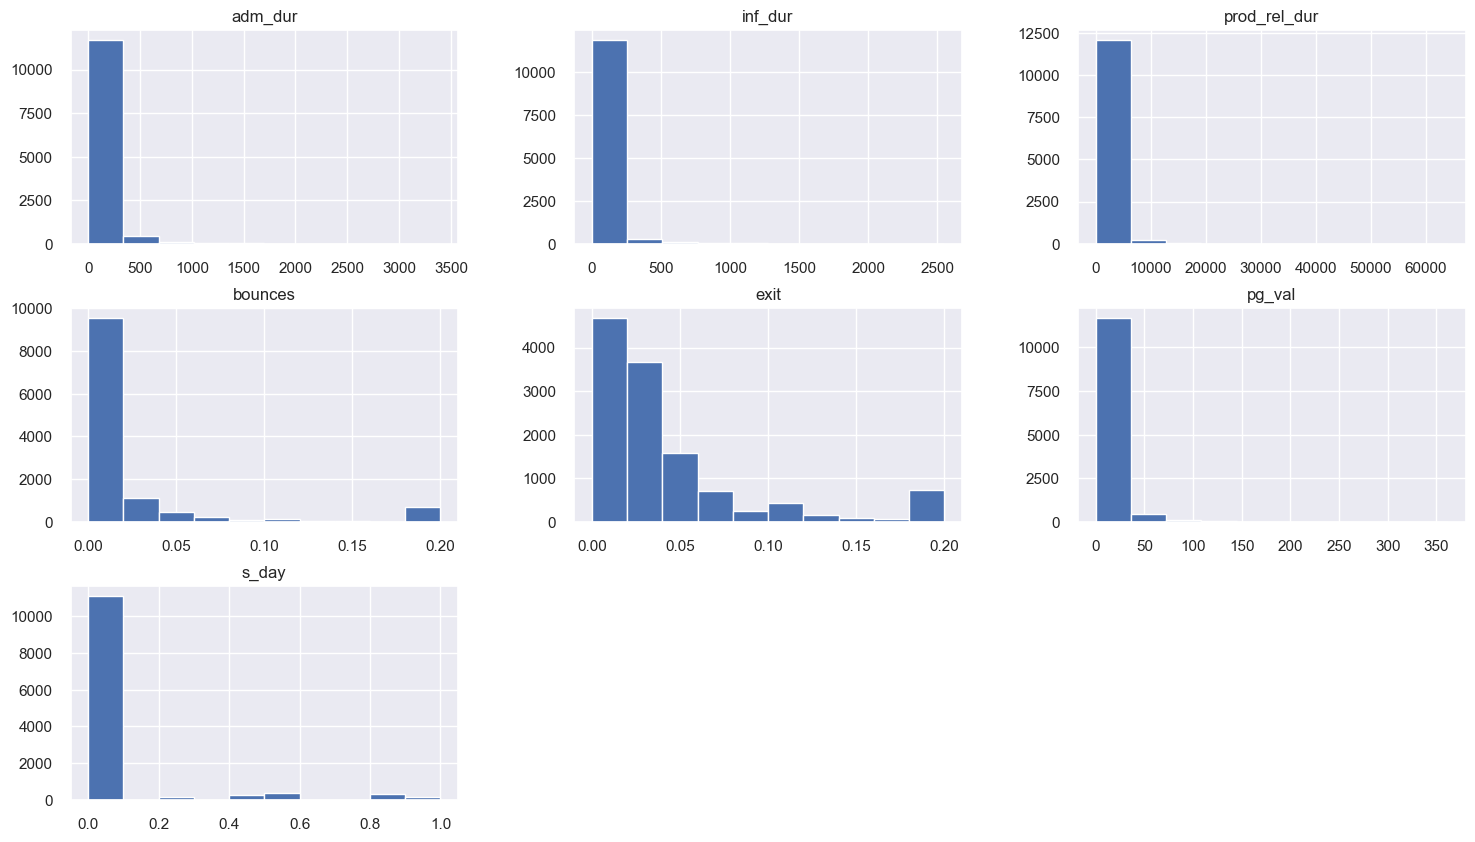

In [31]:
first_df.hist(['adm_dur', 'inf_dur', 'prod_rel_dur', 'bounces', 'exit', 'pg_val',
       's_day'], figsize=(18,10), grid= True);

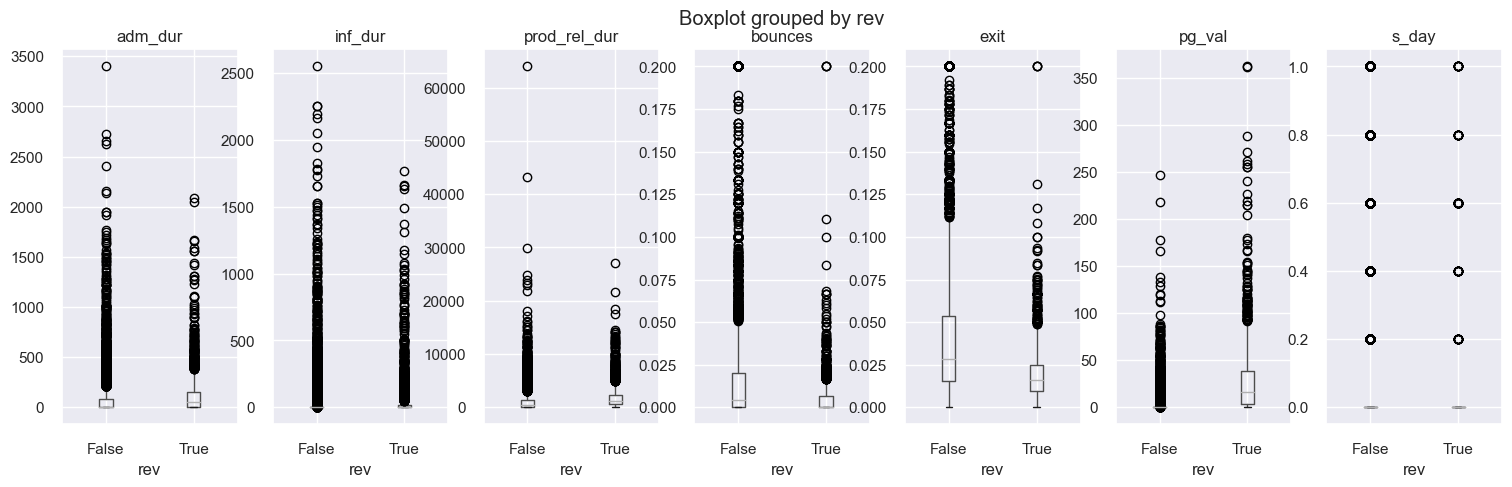

In [32]:
continuousColsList = ['adm_dur', 'inf_dur', 'prod_rel_dur', 'bounces', 'exit', 'pg_val',
       's_day']
fig, PlotCanvas=plt.subplots(nrows=1,
                             ncols=len(continuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Clicked"
for PredictorCol, i in zip(continuousColsList,
                          range(len(continuousColsList))):
    first_df.boxplot(column=PredictorCol, by='rev', figsize=(5,5),
              vert=True, ax=PlotCanvas[i])

In [33]:
# Checking unique values by attribute non numerical
first_df['rev'].unique(), first_df["kend"].unique(), first_df["visitor"].unique(), first_df["month"].unique(),

(array([False,  True]),
 array([False,  True]),
 array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object),
 array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
        'Dec'], dtype=object))

In [34]:
# Tranforming boolean into integer
first_df['rev'] = first_df['rev'].astype(int)
first_df['kend'] = first_df['kend'].astype(int)

In [35]:
first_df['month'].replace('Feb', 2, inplace = True)
first_df['month'].replace('Mar', 3, inplace = True)
first_df['month'].replace('May', 5, inplace = True)
first_df['month'].replace('Oct', 10, inplace = True)
first_df['month'].replace('June', 6, inplace = True)
first_df['month'].replace('Jul', 7, inplace = True)
first_df['month'].replace('Aug', 8, inplace = True)
first_df['month'].replace('Nov', 11, inplace = True)
first_df['month'].replace('Sep', 9, inplace = True)
first_df['month'].replace('Dec', 12, inplace = True)

In [36]:
first_df['visitor'].replace('Returning_Visitor', 0, inplace = True)
first_df['visitor'].replace('New_Visitor', 1, inplace = True)
first_df['visitor'].replace('Other', 2, inplace = True)

In [37]:
Q1 = first_df.quantile(0.25)
Q3 = first_df.quantile(0.75)
IQR = Q3-Q1
IQR.sort_values(ascending=False)

prod_rel_dur    1280.019714
adm_dur           93.256250
prod_rel          31.000000
month              6.000000
adm                4.000000
reg                3.000000
traffic            2.000000
os                 1.000000
exit               0.035714
bounces            0.016813
kend               0.000000
visitor            0.000000
s_day              0.000000
browser            0.000000
pg_val             0.000000
inf_dur            0.000000
inf                0.000000
rev                0.000000
dtype: float64

ChatBPT: The IQR is calculated by finding the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. In other words, it is the range of the middle 50% of the data. The IQR is often used to identify outliers or extreme values in a dataset, and it is a more robust measure of spread than the standard deviation because it is not affected by outliers.

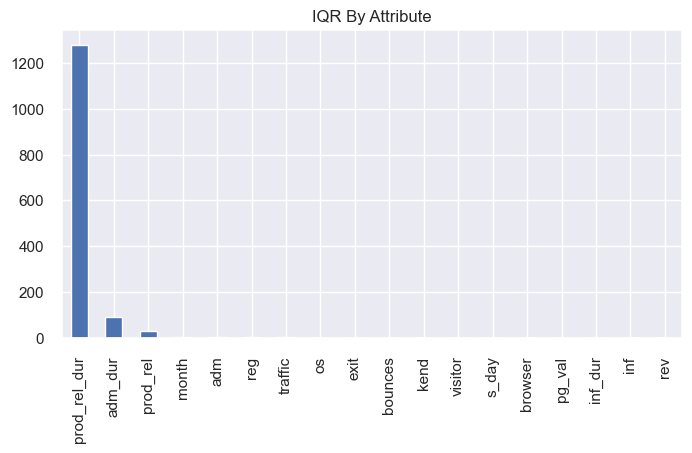

In [38]:
IQR.sort_values(ascending=False).plot(kind="bar",  figsize=(8,4))
plt.title("IQR By Attribute");

In [39]:
skew_df = first_df.skew()
skew_df.sort_values(ascending=False)

inf_dur         7.579185
prod_rel_dur    7.263228
pg_val          6.382964
adm_dur         5.615719
prod_rel        4.341516
inf             4.036464
s_day           3.302667
browser         3.242350
bounces         2.947855
visitor         2.326762
exit            2.148789
os              2.066285
traffic         1.962987
adm             1.960357
rev             1.909509
kend            1.265962
reg             0.983549
month          -0.055407
dtype: float64

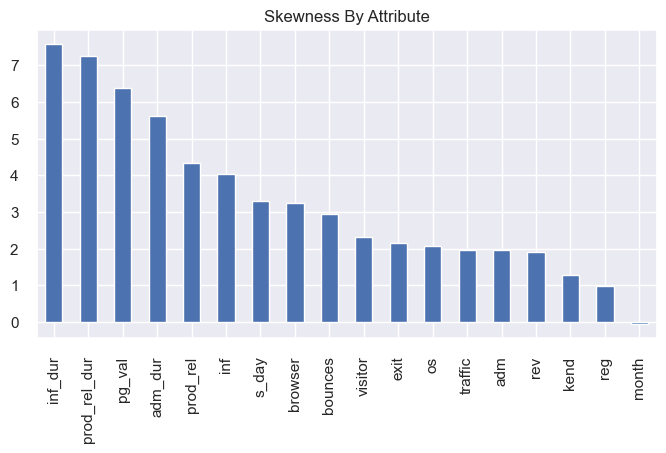

In [40]:
skew_df.sort_values(ascending=False).plot(kind="bar",figsize=(8,4))
plt.title("Skewness By Attribute");

ChatGPT: Skewness is a statistical term that refers to the degree of asymmetry in a distribution of data. A distribution is considered to be symmetrical if it is evenly balanced around its center, which is typically the mean or the median. Skewness is an important concept in statistics because it can affect the interpretation of statistical analyses and the validity of some statistical tests. For example, if the data is highly skewed, the mean may not be an appropriate measure of central tendency, and the median may be a better option.

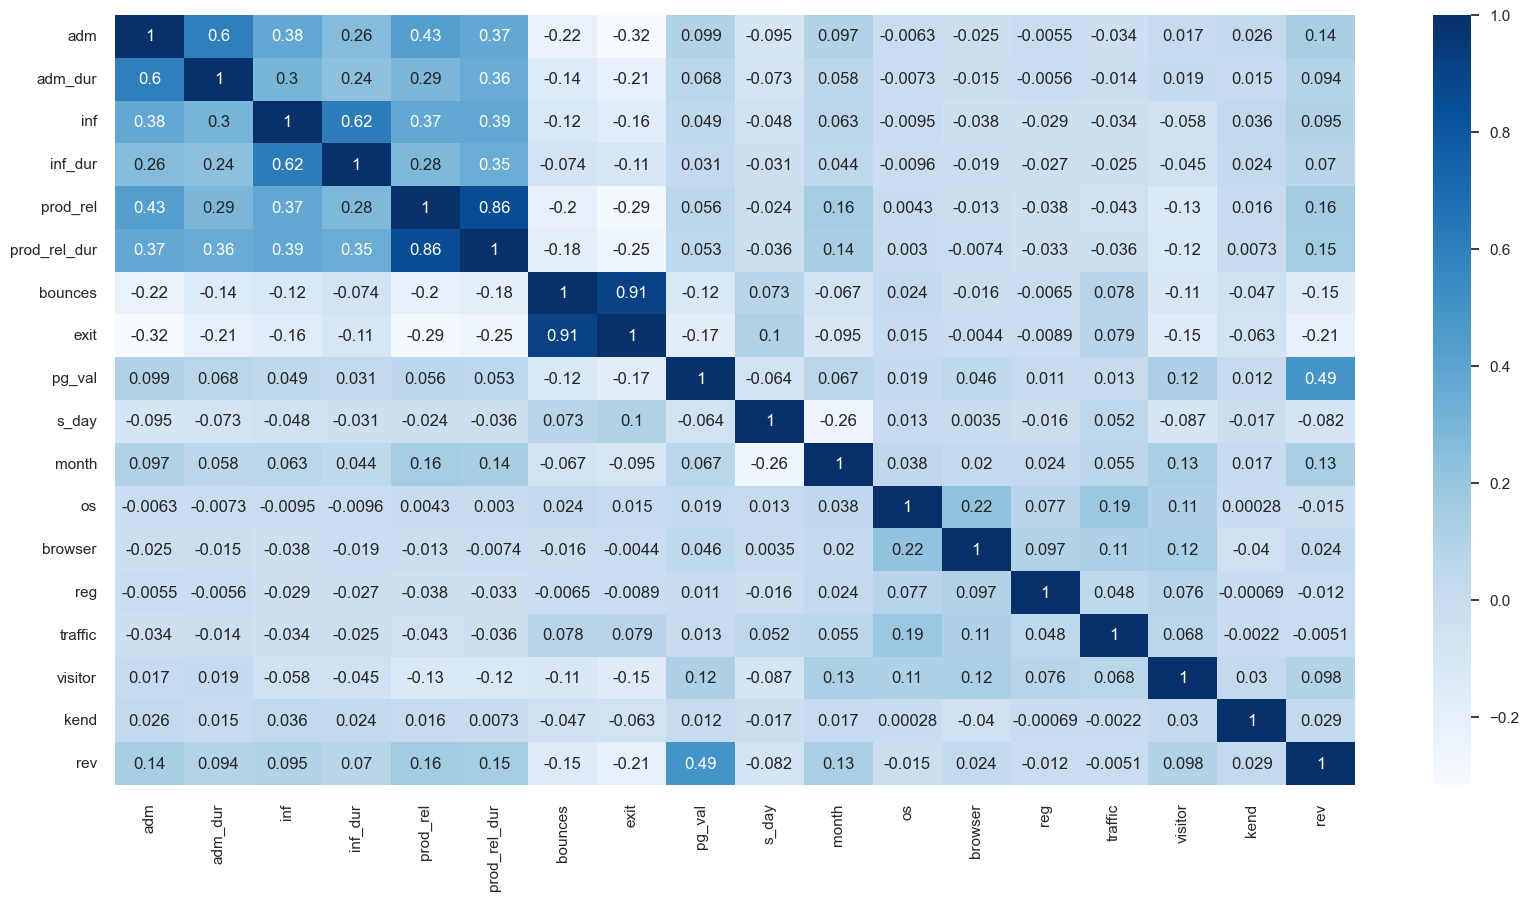

In [41]:
plt.figure(figsize=(20,10))
c = first_df.corr()
sns.heatmap(c,cmap="Blues",annot=True);

## 3.3 Pre-processing data

### 3.3.1 Selecting Significante attributes

In [42]:
# Finging unique values for each column
# To understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is
# likely to be a category otherwise continuous

In [43]:
first_df.nunique()

adm               27
adm_dur         3335
inf               17
inf_dur         1258
prod_rel         311
prod_rel_dur    9551
bounces         1872
exit            4777
pg_val          2704
s_day              6
month             10
os                 8
browser           13
reg                9
traffic           20
visitor            3
kend               2
rev                2
dtype: int64

In [44]:
# Categorical data ['adm','inf','s_day','month','os','browser','reg','traffic','visitor','kend']

In [45]:
# Numerical data ['adm_dur','inf_dur','prod_rel','prod_rel_dur','bounces','exit','pg_val']

In [46]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)

In [47]:
# Calling the function to check which categorical variables are correlated with target
continuousVariables = ['adm','inf','s_day','month','os','browser','reg','traffic','visitor','kend']
FunctionAnova(first_df, 'rev', continuousVariables )

##### ANOVA Results ##### 

adm is correlated with rev | P-Value: 3.519759837717179e-54
inf is correlated with rev | P-Value: 3.1740343112109894e-26
s_day is correlated with rev | P-Value: 5.498934260139406e-20
month is correlated with rev | P-Value: 9.17951243284699e-46
os is NOT correlated with rev | P-Value: 0.10339431070882842
browser is correlated with rev | P-Value: 0.007736888294824106
reg is NOT correlated with rev | P-Value: 0.19794262499095086
traffic is NOT correlated with rev | P-Value: 0.5702433635869331
visitor is correlated with rev | P-Value: 5.861359983891014e-28
kend is correlated with rev | P-Value: 0.0011405626259445205


['adm', 'inf', 's_day', 'month', 'browser', 'visitor', 'kend']

In [48]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [49]:
categoricalVariables = ['adm_dur','inf_dur','prod_rel','prod_rel_dur','bounces','exit','pg_val']

# Calling the function
FunctionChisq(first_df, 'rev', categoricalVariables)

adm_dur is correlated with rev | P-Value: 3.0916911627226634e-68
inf_dur is correlated with rev | P-Value: 5.5336715155252504e-34
prod_rel is correlated with rev | P-Value: 1.2201453528044542e-69
prod_rel_dur is correlated with rev | P-Value: 5.129549976526522e-32
bounces is correlated with rev | P-Value: 2.835234062143618e-21
exit is correlated with rev | P-Value: 3.183048182750372e-38
pg_val is correlated with rev | P-Value: 0.0


['adm_dur', 'inf_dur', 'prod_rel', 'prod_rel_dur', 'bounces', 'exit', 'pg_val']

In [50]:
first_df.columns

Index(['adm', 'adm_dur', 'inf', 'inf_dur', 'prod_rel', 'prod_rel_dur',
       'bounces', 'exit', 'pg_val', 's_day', 'month', 'os', 'browser', 'reg',
       'traffic', 'visitor', 'kend', 'rev'],
      dtype='object')

In [51]:
selectColumns = ['adm', 'adm_dur', 'inf', 'inf_dur', 'prod_rel', 'prod_rel_dur',
       'bounces', 'exit', 'pg_val', 's_day', 'month', 'browser', 'visitor', 'kend', 'rev']
# Selecting final columns
DataForML= first_df[selectColumns]
DataForML.head()

,adm,adm_dur,inf,inf_dur,prod_rel,prod_rel_dur,bounces,exit,pg_val,s_day,month,browser,visitor,kend,rev
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,2,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,0,1,0


In [52]:
DataForML.shape

(12330, 15)

# 4. Data Preparation

## 4.1 Split dataset into X and y

In [53]:
# splitting into X and y
X = DataForML.drop("rev", axis = 1)
y = DataForML['rev']

In [54]:
X = X.values
y = y.values

## 4.2 Nomalization | Scaling

ChatCBT: Scaling check
Check the performance of your model: Train a model on the unscaled data and evaluate its performance. Then, train the same model on the scaled data and compare the performance. If scaling the data leads to a significant improvement in performance, it may be an indication that you need to scale the data.

The ML results are higher without normalization.

In [55]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [56]:
X_scaled = scaler.fit_transform(X)

## 4.3 Balance Dataset

### 4.3.1 SMOTE technique

In [57]:
DataForML['rev'].value_counts()

rev
0    10422
1     1908
Name: count, dtype: int64

In [58]:
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X_scaled, y)

In [59]:
np.bincount(y_smote)

array([10422, 10422], dtype=int64)

## 4.4 Establish Train and Test

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state = 38)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16675, 14), (4169, 14), (16675,), (4169,))

# 5. Model Building and Evaluation

## 5.1 Building Decision Tree Model

### 5.1.1 Apply Decision Tree Model

In [62]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=8)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [63]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2014
           1       0.88      0.89      0.89      2155

    accuracy                           0.88      4169
   macro avg       0.88      0.88      0.88      4169
weighted avg       0.88      0.88      0.88      4169



In [64]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[1742  272]
 [ 227 1928]]
0.880307028064284


### 5.1.2 Find Optimal Hyperparameters using Grid Search

In [65]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {
    'max_depth': range(5, 8, 15),
    'criterion': ["entropy", "gini"],
    'min_samples_leaf': [10, 30, 50]
}

n_folds = 10

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 8, 15),
                         'min_samples_leaf': [10, 30, 50]},
             verbose=1)

In [66]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,0.103031,0.012757,0.000000,0.000000,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.883693,0.867506,...,0.887890,0.874700,0.869826,0.856029,0.865627,0.862028,0.865627,0.871242,0.009527,1
2,0.118303,0.015005,0.001562,0.004687,entropy,5,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.881295,0.872902,...,0.885492,0.878897,0.863827,0.857229,0.868626,0.851230,0.865027,0.870402,0.010601,2
4,0.101769,0.010599,0.000000,0.000000,gini,5,30,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.883693,0.866307,...,0.886091,0.874101,0.868026,0.852430,0.865027,0.862028,0.866227,0.870343,0.009905,3
0,0.153415,0.020378,0.001266,0.002260,entropy,5,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.880695,0.872902,...,0.885492,0.878897,0.862627,0.856029,0.868626,0.851230,0.863827,0.869982,0.010835,4
1,0.138773,0.024864,0.000000,0.000000,entropy,5,30,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.880096,0.872902,...,0.884293,0.878897,0.862627,0.856029,0.868626,0.851230,0.865027,0.869922,0.010547,5
5,0.096814,0.006409,0.000247,0.000741,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.881295,0.866307,...,0.885492,0.871703,0.865627,0.857229,0.865027,0.857828,0.866827,0.869623,0.009094,6


In [67]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print('We can get accuracy of',grid_search.best_estimator_)

best accuracy 0.8712421544468085
We can get accuracy of DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)


In [68]:
# Find the highest accuracy value
cv_results['mean_test_score'].max()

0.8712421544468085

### 5.1.3 Apply Decision Tree Model with best Hyperparameters obtained from Grid Search.

In [69]:
# model with optimal hyperparameters
clf_best = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 38,
                                  max_depth=5,
                                  min_samples_leaf=30
                                  )
clf_best.fit(X_train, y_train)

# accuracy score
clf_best.score(X_test,y_test)

0.8805468937395059

### 5.1.4 Evaluation Decision Tree Model

In [70]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2014
           1       0.91      0.86      0.88      2155

    accuracy                           0.88      4169
   macro avg       0.88      0.88      0.88      4169
weighted avg       0.88      0.88      0.88      4169



Precision: Out of all the shoppers that the model predicted would shop, only (1 = 91)% actually did.

Recall: Out of all the shoppers that actually did buy, the model only predicted this outcome correctly for (1-86)% of those shoppers.

Since this value is very close to 1, it tells us that the model does a good job of predicting whether or not shoppers will buy.

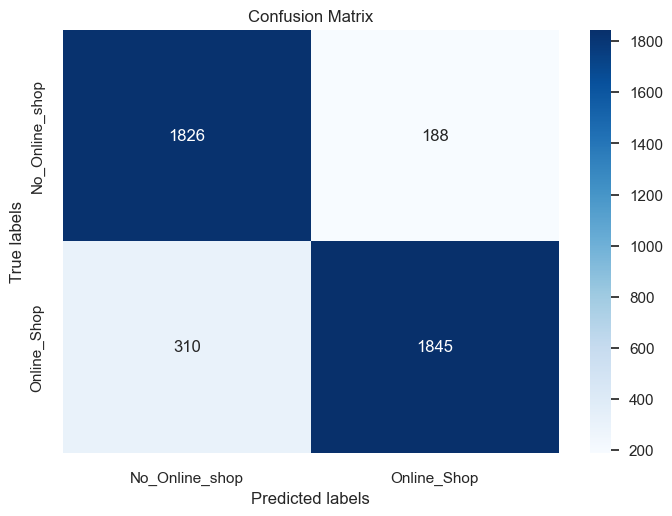

In [71]:
# Confusion matrix
labels = ['No_Online_shop', 'Online_Shop']
cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

### 5.1.5 Plotting Decision Tree

[Text(0.44387755102040816, 0.9166666666666666, 'x[8] <= 0.002\ngini = 0.5\nsamples = 16675\nvalue = [8408, 8267]'),
 Text(0.18877551020408162, 0.75, 'x[10] <= 0.0\ngini = 0.271\nsamples = 8883\nvalue = [7446, 1437]'),
 Text(0.08163265306122448, 0.5833333333333334, 'x[10] <= -0.163\ngini = 0.02\nsamples = 4008\nvalue = [3968, 40]'),
 Text(0.04081632653061224, 0.4166666666666667, 'x[10] <= -0.25\ngini = 0.003\nsamples = 3714\nvalue = [3709, 5]'),
 Text(0.02040816326530612, 0.25, 'gini = 0.0\nsamples = 3527\nvalue = [3527, 0]'),
 Text(0.061224489795918366, 0.25, 'x[1] <= 0.825\ngini = 0.052\nsamples = 187\nvalue = [182, 5]'),
 Text(0.04081632653061224, 0.08333333333333333, 'gini = 0.013\nsamples = 157\nvalue = [156, 1]'),
 Text(0.08163265306122448, 0.08333333333333333, 'gini = 0.231\nsamples = 30\nvalue = [26, 4]'),
 Text(0.12244897959183673, 0.4166666666666667, 'x[1] <= -0.057\ngini = 0.21\nsamples = 294\nvalue = [259, 35]'),
 Text(0.10204081632653061, 0.25, 'gini = 0.0\nsamples = 136\nv

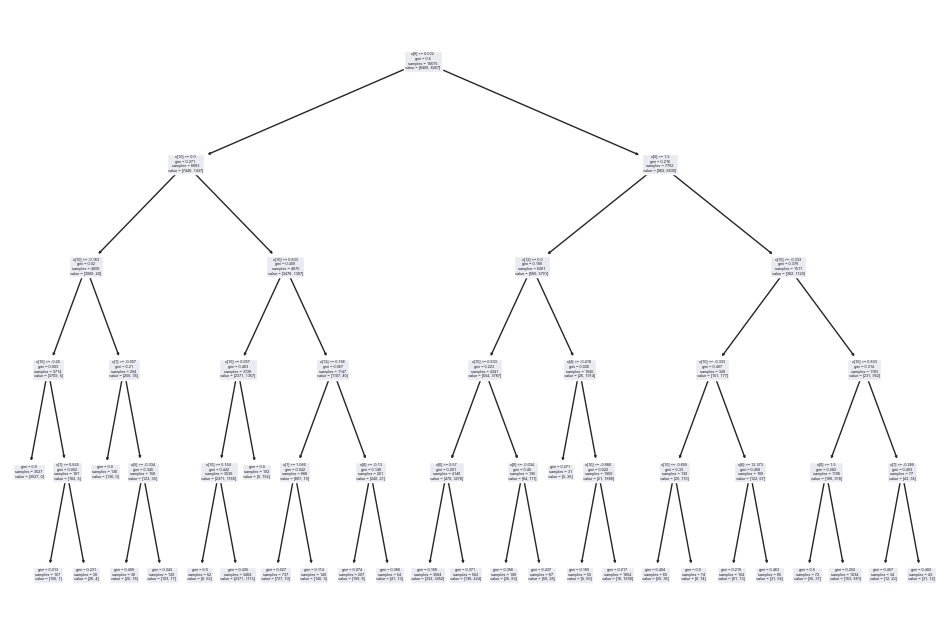

In [72]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_best)

### 5.1.6 Reduce the max_depth to improve the tree visualization

In [73]:
clf_best_maxd = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 38,
                                  max_depth=3,
                                  min_samples_leaf=30
                                  )
clf_best_maxd.fit(X_train, y_train)

# accuracy score
clf_best_maxd.score(X_test,y_test)

0.8632765651235308

[Text(0.5, 0.875, 'x[8] <= 0.002\ngini = 0.5\nsamples = 16675\nvalue = [8408, 8267]'),
 Text(0.25, 0.625, 'x[10] <= 0.0\ngini = 0.271\nsamples = 8883\nvalue = [7446, 1437]'),
 Text(0.125, 0.375, 'x[10] <= -0.163\ngini = 0.02\nsamples = 4008\nvalue = [3968, 40]'),
 Text(0.0625, 0.125, 'gini = 0.003\nsamples = 3714\nvalue = [3709, 5]'),
 Text(0.1875, 0.125, 'gini = 0.21\nsamples = 294\nvalue = [259, 35]'),
 Text(0.375, 0.375, 'x[10] <= 0.833\ngini = 0.409\nsamples = 4875\nvalue = [3478, 1397]'),
 Text(0.3125, 0.125, 'gini = 0.463\nsamples = 3728\nvalue = [2371, 1357]'),
 Text(0.4375, 0.125, 'gini = 0.067\nsamples = 1147\nvalue = [1107, 40]'),
 Text(0.75, 0.625, 'x[0] <= 1.5\ngini = 0.216\nsamples = 7792\nvalue = [962, 6830]'),
 Text(0.625, 0.375, 'x[12] <= 0.0\ngini = 0.168\nsamples = 6281\nvalue = [580, 5701]'),
 Text(0.5625, 0.125, 'gini = 0.223\nsamples = 4341\nvalue = [554, 3787]'),
 Text(0.6875, 0.125, 'gini = 0.026\nsamples = 1940\nvalue = [26, 1914]'),
 Text(0.875, 0.375, 'x[10] <

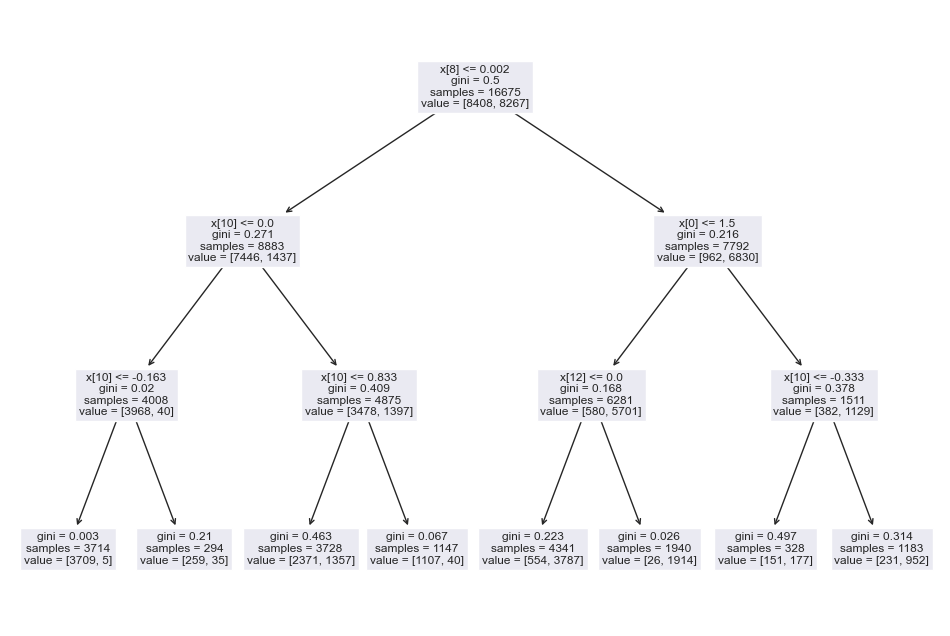

In [74]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_best_maxd)

## 5.2 Building Random Forest Model

### 5.2.1 Apply Random Forest Model

In [75]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [76]:
# Fit the model
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
# Making predictions
predictions = rfc.predict(X_test)

In [78]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2014
           1       0.93      0.95      0.94      2155

    accuracy                           0.94      4169
   macro avg       0.94      0.94      0.94      4169
weighted avg       0.94      0.94      0.94      4169



### the best results found are the Random Forest with default hyperparameters!

### 5.2.2 Find Optimal Hyperparameters using Grid Search

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(1, 5, 10),
    'min_samples_split': range(2, 5, 10),
    'n_estimators': [50, 100, 200],
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1,verbose = 1)

In [80]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(1, 5, 10),
                         'min_samples_split': range(2, 5, 10),
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [81]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9063862197449097 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### 5.2.3 Apply Random Forest Model with best Hyperparameters obtained from Grid Search.

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             max_features= 10,
                             n_estimators=100)

In [83]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10)

### 5.2.4 Evaluation Random Forest Model

In [84]:
# predict
predictions = rfc.predict(X_test)

In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2014
           1       0.92      0.92      0.92      2155

    accuracy                           0.91      4169
   macro avg       0.91      0.91      0.91      4169
weighted avg       0.91      0.91      0.91      4169



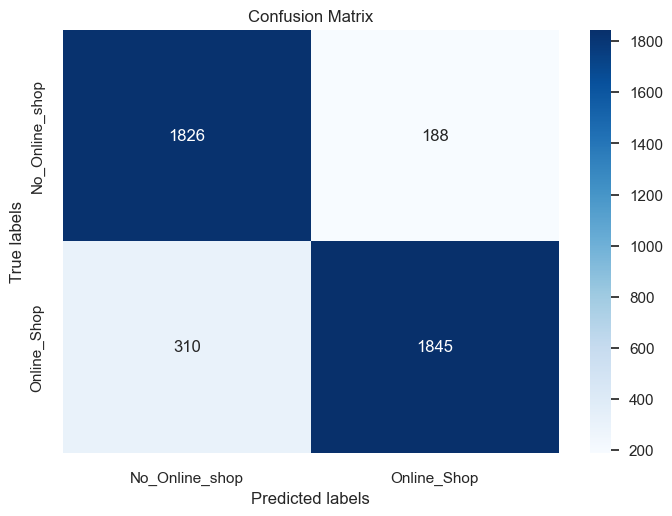

In [86]:
# Confusion matrix
labels = ['No_Online_shop', 'Online_Shop']
cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

Precision: Out of all the shoppers that the model predicted would shop, only (1 = 62)% actually did.

Recall: Out of all the shoppers that actually did buy, the model only predicted this outcome correctly for (1-78)% of those shoppers.

Since this value is very close to 1, it tells us that the model does a good job of predicting whether or not shoppers will buy.

## 5.3 Building SVM Model

### 5.3.1 Apply SVM Model

In [87]:
# using rbf kernel, C=1, default value of gamma
model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [88]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.8160230271048213
precision 0.87882096069869
recall 0.7470997679814385


### 5.3.2 Find Optimal Hyperparameters using Grid Search

In [89]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 38)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel = "rbf")   #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring = 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

# fit the model
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=38, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [90]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.519321,0.365026,1.939868,0.125897,1,0.01,"{'C': 1, 'gamma': 0.01}",0.840780,0.849775,0.844078,...,0.848636,0.005886,6,0.864618,0.864918,0.863793,0.863268,0.865142,0.864348,0.000707
1,5.784454,0.462549,1.965322,0.157696,1,0.001,"{'C': 1, 'gamma': 0.001}",0.831784,0.836282,0.826387,...,0.835322,0.007624,9,0.842654,0.840180,0.841154,0.838231,0.842654,0.840975,0.001663
2,5.776672,0.437773,2.152858,0.029373,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.811994,0.815592,0.804798,...,0.815532,0.010093,12,0.817916,0.817166,0.818441,0.812744,0.818291,0.816912,0.002130
3,6.815302,0.392380,1.751650,0.091527,10,0.01,"{'C': 10, 'gamma': 0.01}",0.860270,0.865367,0.862069,...,0.864828,0.003884,3,0.889355,0.889730,0.889130,0.888531,0.891154,0.889580,0.000878
4,6.026050,0.422406,1.744722,0.087443,10,0.001,"{'C': 10, 'gamma': 0.001}",0.843178,0.848576,0.841979,...,0.846297,0.006461,7,0.855397,0.855097,0.856297,0.854048,0.858246,0.855817,0.001411
5,5.481450,0.295199,1.962430,0.161539,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.828486,0.829685,0.823088,...,0.829805,0.007270,11,0.832459,0.832309,0.833133,0.831409,0.832684,0.832399,0.000568
6,9.691628,0.395511,1.720301,0.169595,100,0.01,"{'C': 100, 'gamma': 0.01}",0.876462,0.873463,0.874063,...,0.875442,0.001985,2,0.909520,0.910720,0.909670,0.907121,0.911169,0.909640,0.001405
7,9.678848,0.235616,1.657107,0.087168,100,0.001,"{'C': 100, 'gamma': 0.001}",0.851574,0.859070,0.855472,...,0.854993,0.004260,5,0.869490,0.869040,0.867016,0.868366,0.870090,0.868801,0.001055
8,6.643055,0.443947,2.061244,0.263886,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.834783,0.835382,0.826087,...,0.834963,0.006502,10,0.841904,0.839205,0.840480,0.838981,0.842729,0.840660,0.001469
9,23.226065,1.379513,1.948286,0.238129,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.884258,0.881259,0.882759,...,0.883058,0.002406,1,0.929160,0.929835,0.927736,0.928411,0.928861,0.928801,0.000705


In [91]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8830584707646179 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


### 5.3.3 Apply SVM Model with best Hyperparameters obtained from Grid Search.

In [92]:
# specify optimal hyperparameters
best_params = {"C": 1000, "gamma": 0.01, "kernel":"rbf"}

# model
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 5.3.4 Evaluation SVM Model

In [93]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1845,  169],
       [ 233, 1922]], dtype=int64)

In [94]:
# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))

[[1845  169]
 [ 233 1922]] 

accuracy 0.903573998560806
precision 0.9191774270683883
sensitivity/recall 0.8918793503480278


# 6. Conclusions (Tests and Experimentations)

* During the process of testig diferent scenarios for the Machine Learning Models, When we deleted or replace outliers, our models performance went low.
* To balance our dataset we have tried both NearMiss and SMOTE techniques. However, the performance using SMOTE Techniques are better. On the other hand, we decided that reduce the observations is not an appropriated appoache because it could bring issues like the curse of dimensionality.
* To Normalize our dataset, we have tried Scale, StandardScaled and MinMaxScaler. The  Robust Scaler is the optimal solution.
* Tests were performed, including the Principal Componentes Analysis (PCA) . It reduced our attributes to 3. However, the Machine Learning worked poorly since it reduced our accuracy.

In [ ]:
stop here!!!

# 7. Appendix

## Appendix: ML tests

In [95]:
Results
LR: 0.880271 (0.005901)
LDA: 0.878142 (0.005999)
KNN: 0.864151 (0.008836)-
CART: 0.862125 (0.006562)
NB: 0.841646 (0.008210)
SVM: 0.843877 (0.000460)-

Results + MinMaxScale
LR: 0.874493 (0.004878) -
LDA: 0.878142 (0.005999)
KNN: 0.857460 (0.009020)-
CART: 0.863240 (0.007857)
NB: 0.809002 (0.013848)-
SVM: 0.855434 (0.002435)-

Results + StandardScale
LR: 0.881386 (0.006309)
LDA: 0.878142 (0.005999)
KNN: 0.873683 (0.009514)
CART: 0.862529 (0.008552)
NB: 0.809002 (0.013848)-
SVM: 0.890206 (0.006223)

Results + SMOTE
LR: 0.833273 (0.009313)
LDA: 0.782102 (0.013706)
KNN: 0.870691 (0.008848)
CART: 0.910691 (0.010115)
NB: 0.765405 (0.013428)
SVM: 0.785886 (0.006352)

Results + NearMiss
LR: 0.961341 (0.008388)
LDA: 0.916186 (0.015254)
KNN: 0.957770 (0.008064)
CART: 0.947696 (0.009891)
NB: 0.958418 (0.009486)
SVM: 0.899944 (0.013249)

Results + SMOTE + StandardScale
LR: 0.832973 (0.010521)
LDA: 0.779159 (0.010554)
KNN: 0.884204 (0.005639)+
CART: 0.903063 (0.008388)++
NB: 0.736637 (0.010274)
SVM: 0.872012 (0.010324)

Results + NearMiss + StandardScale
LR: 0.888902 (0.022292)+
LDA: 0.846662 (0.025134)+
KNN: 0.846341 (0.016523)
CART: 0.843086 (0.018396)
NB: 0.835616 (0.023769)
SVM: 0.892473 (0.022096)+

SyntaxError: invalid syntax (1394747654.py, line 4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

## Appendix: Balancing tests

#### NearMiss Technique

In [ ]:
nr = NearMiss()
X_train, y_train = nr.fit_resample(X_train, y_train)

## Appendix: Normalization Tests

### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Scale

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
X_scaled = scale(X)

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Appendix: PCA test

In [ ]:
df_no_label = DataForML.drop(columns=["rev"])
df_no_label.shape

In [ ]:
pca = PCA().fit(df_no_label)

In [ ]:
pca = PCA().fit(X)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Ratio',fontsize = 12)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlim(0,10)
sns.set(color_codes=True);

In [ ]:
pca = PCA(3)
df_projected = pca.fit_transform(X)

In [ ]:
col_names = ['col_' + str(i) for i in range(1, 4)]
print(col_names)

In [ ]:
pca_df = pd.DataFrame(df_projected, columns =['col_1', 'col_2', 'col_3'])

In [ ]:
pca_df["rev"] = DataForML["rev"]

In [ ]:
pca_df.head()

In [ ]:
print('STATUS: Original Shape (before PCA): ', X.shape)
print('STATUS: Transformed Shape (after PCA): ',pca_df.shape)